In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path="./Data/Canada.csv"
canada_df=pd.read_csv(path)

In [3]:
del canada_df['Unnamed: 0']
canada_df=canada_df.drop(columns=['AREA','REG','DEV'])
canada_df=canada_df.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'})
canada_df['Total_immigration']=canada_df.sum(axis=1,numeric_only=True)
canada_df.head()

,Type,Coverage,Country,Continent,Region,DevName,1980,1981,1982,1983,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_immigration
0,Immigrants,Foreigners,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Immigrants,Foreigners,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Immigrants,Foreigners,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Immigrants,Foreigners,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Immigrants,Foreigners,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


1.Plot the immigrants from China year wise 1980-2013.

In [4]:
copy_canada_df=canada_df.copy()
copy_canada_df=copy_canada_df.set_index('Country')

In [5]:

china_df=copy_canada_df.loc[copy_canada_df.index=='China','1980':'2013']
china_df

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


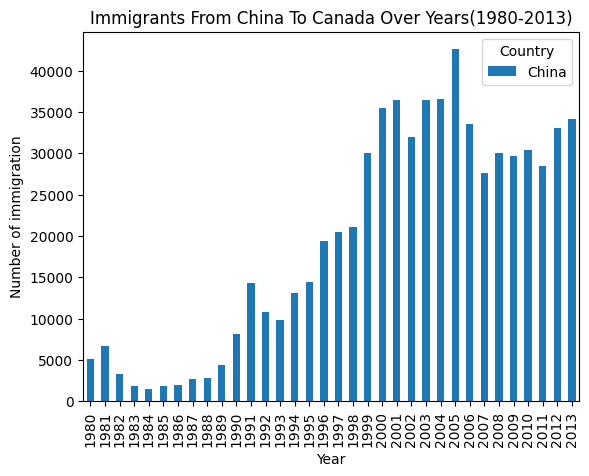

In [6]:
china_df.T.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of immigration')
plt.title('Immigrants From China To Canada Over Years(1980-2013)')
plt.show()

2.Which country has sent highest/lowest immigrants (total)

In [7]:
top_country=copy_canada_df.sort_values(by='Total_immigration',ascending=False).head(1)
bottom_country=copy_canada_df.sort_values(by='Total_immigration',ascending=False).tail(1)
top=top_country.index
bottom=bottom_country.index

In [8]:
print(f'The highest total immigration to Canada is from {top[0]}')
print(f'The lowest total immigration to Canada is from {bottom[0]}')

The highest total immigration to Canada is from India
The lowest total immigration to Canada is from Palau


3.Which country has sent highest/lowest immigrants in 2013.

In [9]:
df_2013=copy_canada_df['2013']
top_2013=df_2013.sort_values(ascending=False).head(1)
bottom_2013=df_2013.sort_values(ascending=False).tail(1)
top=top_2013.index
bottom=bottom_2013.index
print(f'The country having highest migration to Canada in 2013 is {top[0]}')
print(f'The country having least migration to Canada in 2013 is {bottom[0]}')

The country having highest migration to Canada in 2013 is China
The country having least migration to Canada in 2013 is Marshall Islands


4. which continent has sent highest/lowest immigrants to canada(total/2013 or any other year)

In [10]:
continent_df=canada_df.groupby('Continent').sum('Total_immigration')
top_continent=continent_df.sort_values(by='Total_immigration',ascending=False).head(1)
bottom_continent=continent_df.sort_values(by='Total_immigration',ascending=False).tail(1)
t_c=top_continent.index
b_c=bottom_continent.index
print(f'The continent having highest total migration to Canada is {t_c[0]}')
print(f'The continent having lowest total migration to Canada is {b_c[0]}')


The continent having highest total migration to Canada is Asia
The continent having lowest total migration to Canada is Oceania


In [11]:
conti_2013_top=continent_df['2013'].sort_values(ascending=False).head(1)
conti_2013_bottom=continent_df['2013'].sort_values(ascending=False).tail(1)
t_13=conti_2013_top.index
b_13=conti_2013_bottom.index
print(f'The continent having highest total migration to Canada in 2013 is {t_13[0]}')
print(f'The continent having lowest total migration to Canada in 2013 is {b_13[0]}')

The continent having highest total migration to Canada in 2013 is Asia
The continent having lowest total migration to Canada in 2013 is Oceania


5.Rate of increase /decrease in the immigrants from 1980 to 2013 for India

In [12]:
india_df=copy_canada_df.loc[copy_canada_df.index=='India','1980':'2013']
initial_value = india_df['1980']
final_value = india_df['2013']
total_change = final_value - initial_value
years = len(india_df.columns) 
rate_of_change = total_change / (years - 1)

print(f"Total Change: {total_change.values[0]}")
print(f"Average Annual Rate of Change: {rate_of_change.values[0]}")

Total Change: 24207
Average Annual Rate of Change: 733.5454545454545


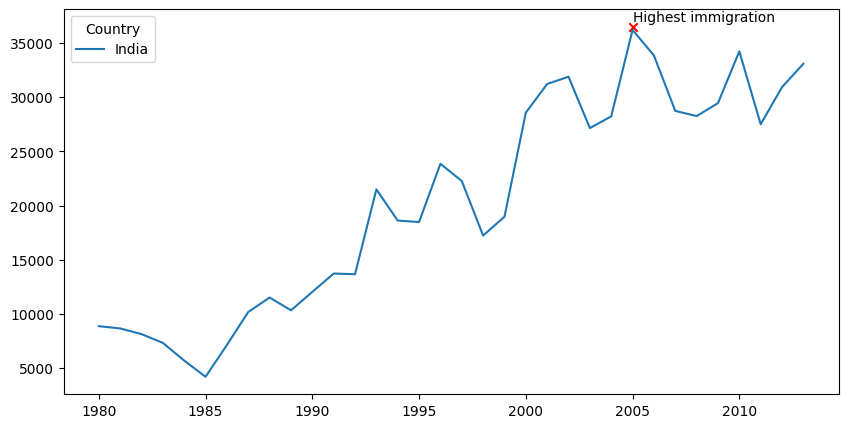

In [13]:
india_df.T.plot(kind='line',
                figsize=(10,5))

plt.scatter(25,36500,color='red',marker='x')
plt.text(25,37000,'Highest immigration')

plt.show()

6.Total migration every year from 1980-2013 is increasing,decreasing or constant?

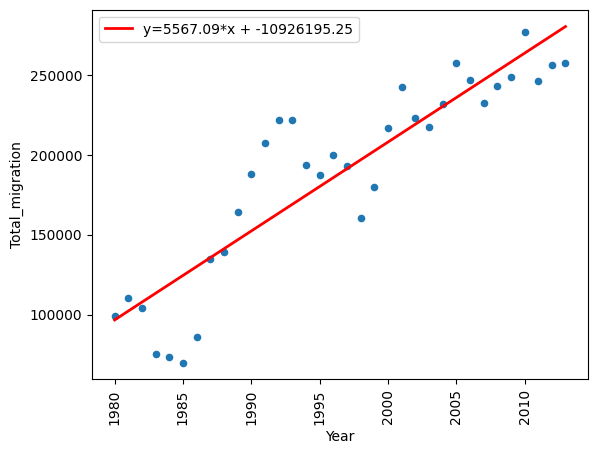

In [14]:
# Overall trend
year_df=canada_df.iloc[:,6:40].sum(axis=0)
year_df=pd.DataFrame(year_df).reset_index()
year_df=year_df.rename(columns={'index':'Year',0:'Total_migration'})
year_df['Year']=pd.to_numeric(year_df['Year'])
year_df['Total_migration']=pd.to_numeric(year_df['Total_migration'])
year_df.plot(kind='scatter',
             x='Year',
             y='Total_migration',
             rot=90)
x=year_df['Year']
y=year_df['Total_migration']
fit=np.polyfit(x,y,1)
plt.plot(x,fit[0]*x + fit[1],color='red',lw=2,label=f'y={fit[0]:.2f}*x + {fit[1]:.2f}')
plt.legend()
plt.show()


From the above plot, it is evident that migration has been steadily increasing over the years.

In [15]:
# Monotonic increase/decrease check.
migration_diff=year_df['Total_migration'].diff().dropna()
trend='constant'
if migration_diff.is_monotonic_increasing:
    trend='increasing'
elif migration_diff.is_monotonic_decreasing:
    trend='decreasing'
print(f'The total migration trend from 1980 to 2013 is {trend}.')


The total migration trend from 1980 to 2013 is constant.


7. Compare the trend of top 5 countries that contributed the most to immigration to Canada.


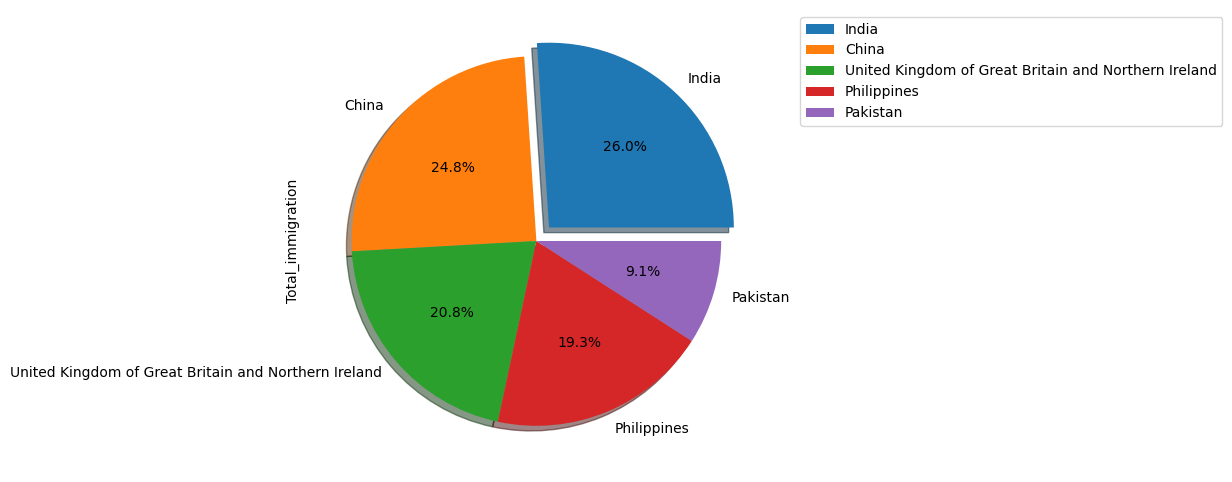

In [16]:
top_5_country=copy_canada_df.sort_values(by='Total_immigration',ascending=False).head()
top_5_country=top_5_country['Total_immigration']
#top_5_country=pd.DataFrame(top_5_country).reset_index()
top_5_country.plot(kind='pie',
                   figsize=(10,6),
                   y='Total_immigration',
                   autopct='%1.1f%%',
                   explode=[0.1,0,0,0,0],
                   shadow=True
                   )
plt.legend(loc='upper right',bbox_to_anchor=(2,1))
plt.show()

On punjab data:

1- highest/lowest total damage of all years or a particular year


In [47]:
path='./Data/Damagetopublic.csv'
punjab_data=pd.read_csv(path)
punjab_data=punjab_data
punjab_data=punjab_data.rename(columns={'District/Year':'District'})

In [48]:
punjab_data['Total_damage']=punjab_data.sum(axis=1,numeric_only=True)
punjab_data.sort_values(by='Total_damage',ascending=False)
year_damage=punjab_data.iloc[:,1:56].sum(axis=0,numeric_only=True)
year_damage=pd.DataFrame(year_damage).reset_index()
year_damage=year_damage.rename(columns={'index':'Year',0:'Total_Damage'})

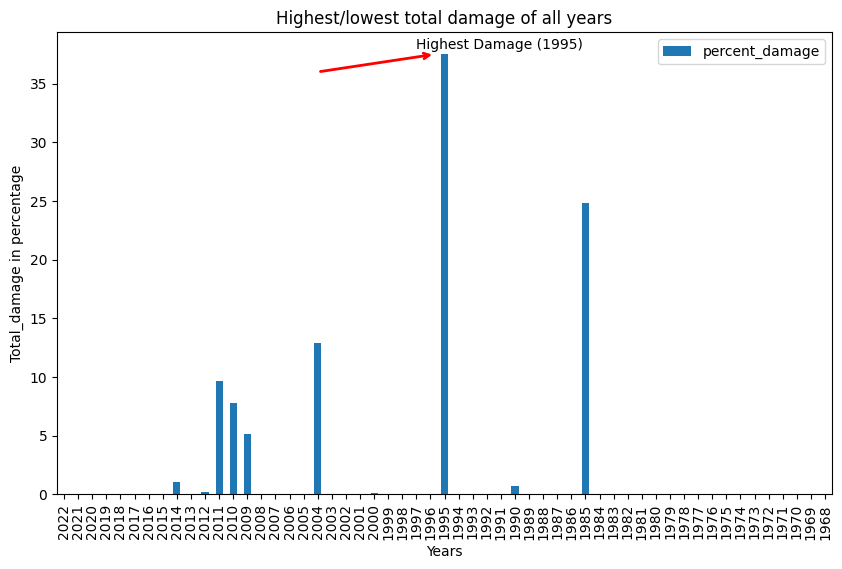

In [88]:

net_damage=sum(year_damage['Total_Damage'])
year_damage['percent_damage']=(year_damage['Total_Damage']/net_damage)*100
year_damage.plot(kind='bar',
                 x='Year',
                 y='percent_damage',
                 figsize=(10,6))
plt.annotate(
    'Highest Damage (1995)',
    xy=(18,36),
    xycoords='data',
    xytext=(25,38),
    arrowprops=dict(arrowstyle='<-',color='red',lw=2)
)

plt.xlabel('Years')
plt.ylabel('Total_damage in percentage')
plt.title('Highest/lowest total damage of all years')
plt.show()

2- Total damage district wise for all years (pie chart).

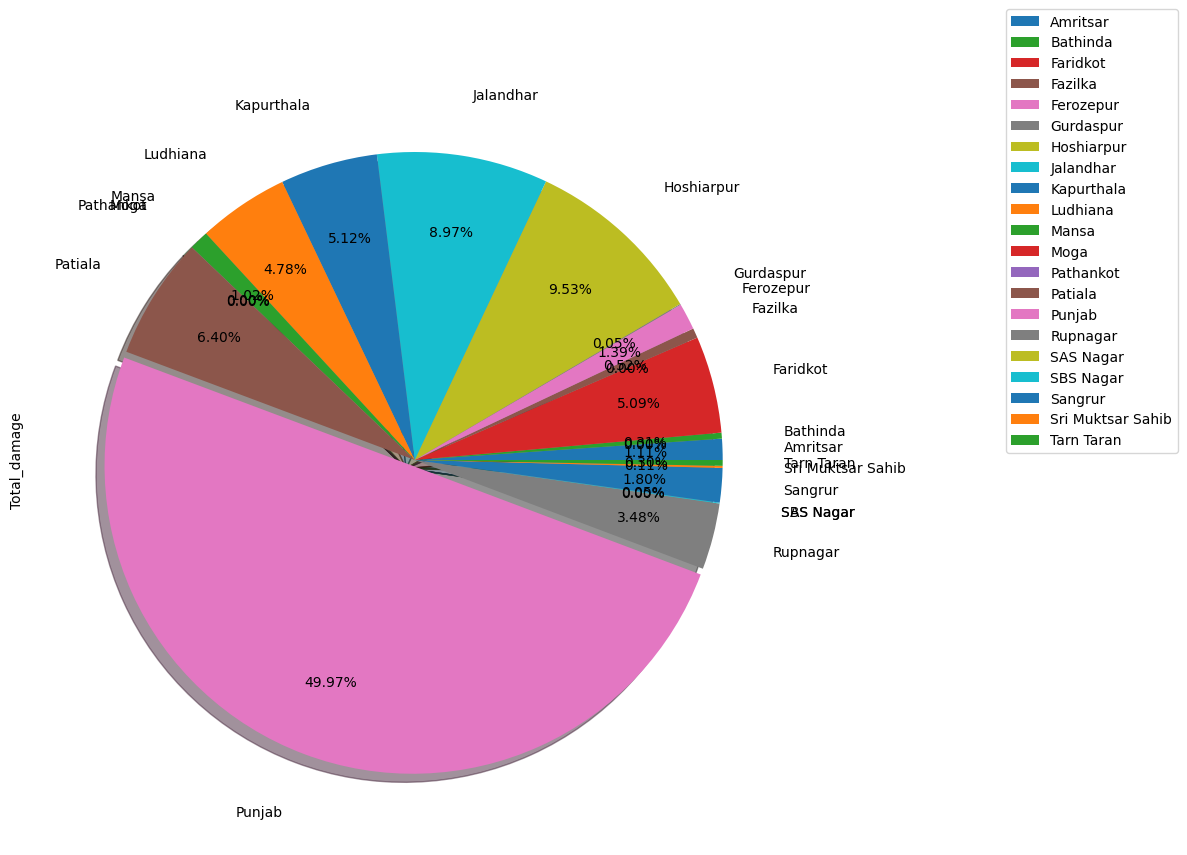

In [138]:
pie_data=punjab_data.groupby('District').sum('Total_damage')
pie_data.plot(kind='pie',
              y='Total_damage',
              autopct='%1.2f%%',
              pctdistance=0.75,
              figsize=(10,10),
              labeldistance=1.2,
              explode=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.02,0,0,0,0,0,0],
              shadow=True)
plt.legend(loc='lower right',bbox_to_anchor=(1.5,0.5))
plt.show()

3- Find top 3 districts in terms of damage and bottom 3 districts in terms of damage

In [144]:
sorted_df=punjab_data.sort_values(by='Total_damage',ascending=False)
top_3_damaged_districts=sorted_df.head(3)
bottom_3_damaged_districts=sorted_df.tail(3)

In [145]:
top_3_damaged_districts

,District,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,1976,1975,1974,1973,1972,1971,1970,1969,1968,Total_damage
22,Punjab,490.0,NaN,NaN,NaN,NaN,NaN,324.0,NaN,42393.0,...,211.0,211.0,219.0,226.0,228.0,198.0,210.0,228.0,183.0,4108599.0
7,Hoshiarpur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66.0,66.0,66.0,69.0,71.0,108.0,119.0,138.0,123.0,783402.0
5,Jalandhar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,13.0,13.0,13.0,12.0,NaN,NaN,NaN,NaN,737645.0


In [146]:
bottom_3_damaged_districts

,District,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,1976,1975,1974,1973,1972,1971,1970,1969,1968,Total_damage
9,SAS Nagar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
19,Barnala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
21,Fatehgarh Sahib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


4- year wise damage for any three districts (line chart)

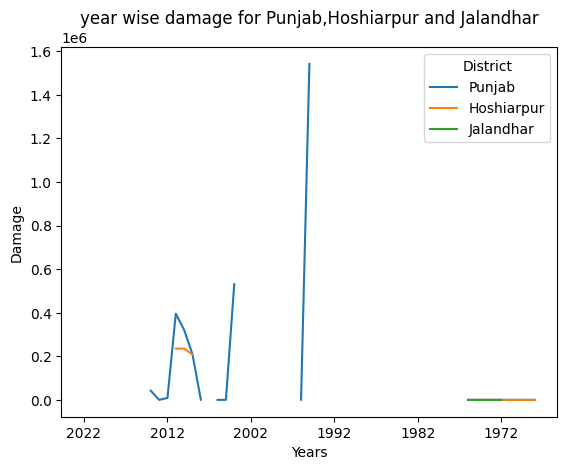

In [165]:
line_df=top_3_damaged_districts.iloc[:,0:56]
line_df.set_index('District').T.plot()
plt.xlabel('Years')
plt.ylabel('Damage')
plt.title('year wise damage for Punjab,Hoshiarpur and Jalandhar')
plt.show()
